<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/chapter03_introduction_to_ml_frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [1]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 40.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.22.1 which is incompatible.


In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [3]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Introduction to TensorFlow, PyTorch, JAX, and Keras

### A brief history of deep learning frameworks

### How these frameworks relate to each other

### Introduction to TensorFlow

#### First steps with TensorFlow

##### Tensors and variables in TensorFlow

###### Constant tensors

In [4]:
import tensorflow as tf
tf.ones(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [ ]:
tf.zeros(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [5]:
tf.constant([1, 2, 3], dtype="float32")

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

###### Random tensors

In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.00882495]
 [ 0.14293878]
 [-0.98156315]], shape=(3, 1), dtype=float32)


In [10]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.47996926]
 [0.8973174 ]
 [0.52388155]], shape=(3, 1), dtype=float32)


###### Tensor assignment and the Variable class

In [11]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.0

In [12]:
x

array([[0., 1.],
       [1., 1.]])

In [13]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.38256314],
       [-0.82822096],
       [ 0.43696222]], dtype=float32)>


In [14]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [16]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

##### Tensor operations: Doing math in TensorFlow

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
f = tf.concat((a, b), axis=0)

In [18]:
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

##### Gradients in TensorFlow: A second look at the GradientTape API

**[경사하강 엑셀 예제를 파이썬 구현](https://github.com/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/ML%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%AA%A8%EB%8D%B8%20%EC%84%A0%ED%83%9D%EA%B3%BC%ED%8F%89%EA%B0%80.xlsx)**

Final regression equation: y = 0.4973x + 0.1759


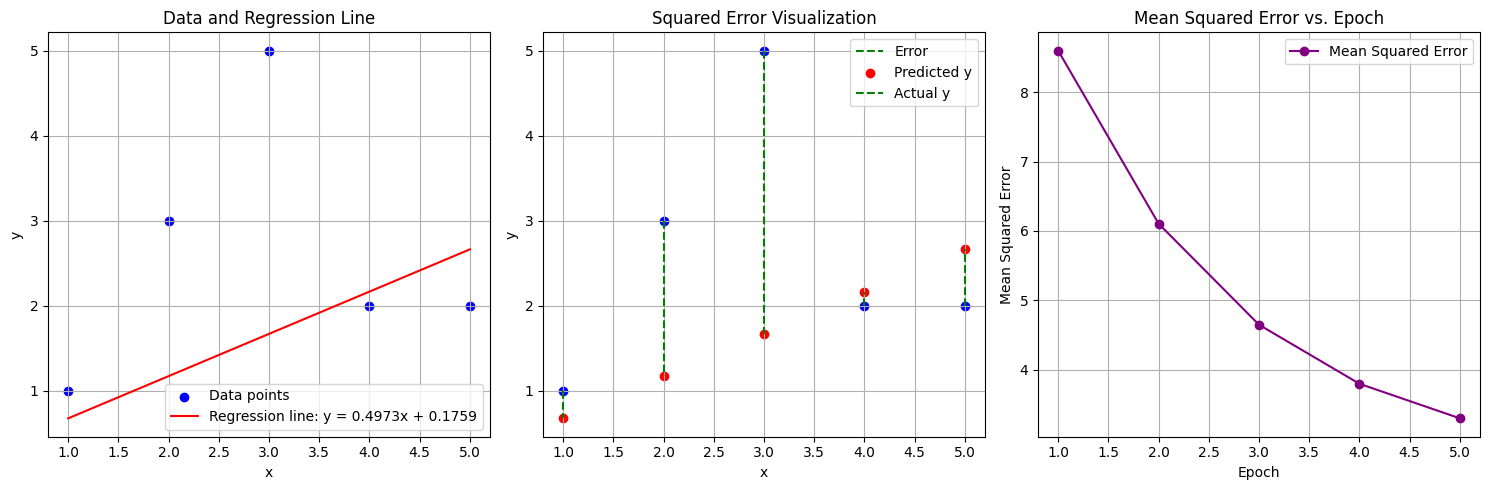

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x_data = np.array([1, 2, 4, 3, 5], dtype=np.float32)
y_data = np.array([1, 3, 2, 5, 2], dtype=np.float32)

# 변수 초기화 (a, b: y = ax + b 모델 파라미터)
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# 학습률과 에포크 설정
learning_rate = 0.01
epochs = 5

# 제곱 오차를 저장할 리스트
squared_errors = []

# 경사 하강법으로 모델 학습
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = a * x_data + b  # 선형 모델: y = ax + b
        error = y_pred - y_data  # 오차
        squared_error = tf.reduce_mean(tf.square(error))  # 평균 제곱 오차
        squared_errors.append(squared_error.numpy())

    # 기울기 계산
    da, db = tape.gradient(squared_error, [a, b])

    # 파라미터 업데이트
    a.assign_sub(learning_rate * da)
    b.assign_sub(learning_rate * db)

# 최종 회귀식 파라미터
final_a = a.numpy()
final_b = b.numpy()
print(f"Final regression equation: y = {final_a:.4f}x + {final_b:.4f}")

# 시각화 (같은 행에 배치)
plt.figure(figsize=(15, 5))

# 1. 데이터와 회귀선 시각화
plt.subplot(1, 3, 1)
plt.scatter(x_data, y_data, color='blue', label='Data points')
x_range = np.linspace(min(x_data), max(x_data), 100)
y_pred_line = final_a * x_range + final_b
plt.plot(x_range, y_pred_line, color='red', label=f'Regression line: y = {final_a:.4f}x + {final_b:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Regression Line')
plt.legend()
plt.grid(True)

# 2. 제곱 오차 시각화 (각 데이터 포인트에 대해)
plt.subplot(1, 3, 2)
y_pred_points = final_a * x_data + final_b
for i in range(len(x_data)):
    plt.plot([x_data[i], x_data[i]], [y_data[i], y_pred_points[i]], color='green', linestyle='--')
    plt.scatter(x_data[i], y_pred_points[i], color='red')
plt.scatter(x_data, y_data, color='blue', label='Actual y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Squared Error Visualization')
plt.legend(['Error', 'Predicted y', 'Actual y'])
plt.grid(True)

# 3. 평균 제곱 오차 시각화 (에포크에 따른 변화)
plt.subplot(1, 3, 3)
plt.plot(range(1, epochs + 1), squared_errors, color='purple', marker='o', label='Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
input_var = tf.Variable(initial_value=3.0)
print(input_var)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [42]:
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [43]:
time = tf.Variable(0.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

##### Making TensorFlow functions fast using compilation

In [44]:
@tf.function
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

In [45]:
@tf.function(jit_compile=True)
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

#### An end-to-end example: A linear classifier in pure TensorFlow

In [46]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

In [47]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [48]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32"),
    )
)

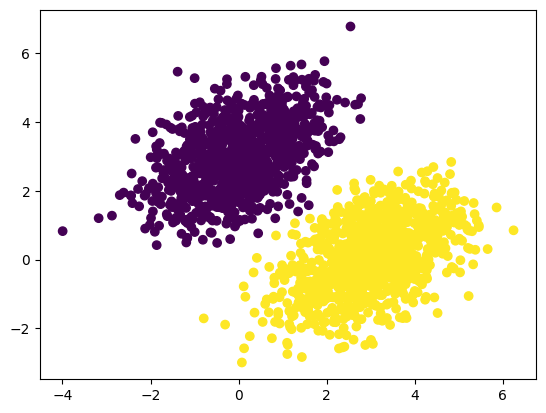

In [49]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [50]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [51]:
def model(inputs, W, b):
    return tf.matmul(inputs, W) + b

In [52]:
def mean_squared_error(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [53]:
learning_rate = 0.1

@tf.function(jit_compile=True)
def training_step(inputs, targets, W, b):
    with tf.GradientTape() as tape:
        predictions = model(inputs, W, b)
        loss = mean_squared_error(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [54]:
for step in range(40):
    loss = training_step(inputs, targets, W, b)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.2492
Loss at step 1: 0.8393
Loss at step 2: 0.2518
Loss at step 3: 0.1572
Loss at step 4: 0.1350
Loss at step 5: 0.1241
Loss at step 6: 0.1155
Loss at step 7: 0.1078
Loss at step 8: 0.1008
Loss at step 9: 0.0944
Loss at step 10: 0.0886
Loss at step 11: 0.0833
Loss at step 12: 0.0784
Loss at step 13: 0.0740
Loss at step 14: 0.0699
Loss at step 15: 0.0662
Loss at step 16: 0.0628
Loss at step 17: 0.0597
Loss at step 18: 0.0569
Loss at step 19: 0.0543
Loss at step 20: 0.0519
Loss at step 21: 0.0498
Loss at step 22: 0.0478
Loss at step 23: 0.0460
Loss at step 24: 0.0443
Loss at step 25: 0.0428
Loss at step 26: 0.0414
Loss at step 27: 0.0402
Loss at step 28: 0.0390
Loss at step 29: 0.0380
Loss at step 30: 0.0370
Loss at step 31: 0.0361
Loss at step 32: 0.0353
Loss at step 33: 0.0346
Loss at step 34: 0.0339
Loss at step 35: 0.0333
Loss at step 36: 0.0328
Loss at step 37: 0.0323
Loss at step 38: 0.0318
Loss at step 39: 0.0314


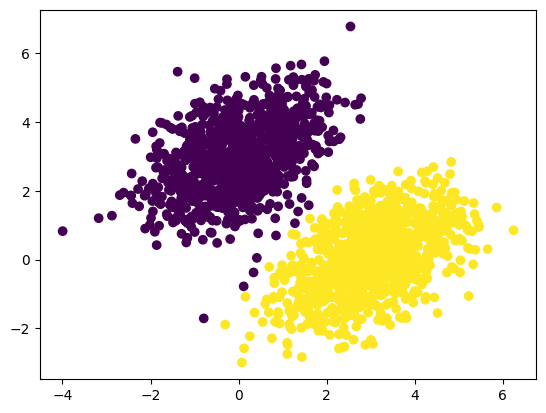

In [55]:
predictions = model(inputs, W, b)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

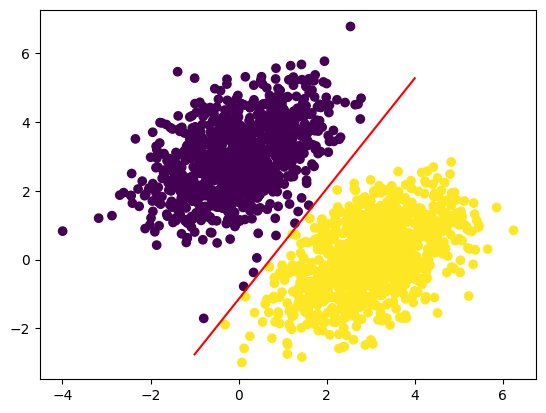

In [56]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

#### What makes the TensorFlow approach unique

### Introduction to PyTorch

#### First steps with PyTorch

##### Tensors and parameters in PyTorch

###### Constant tensors

In [57]:
import torch
torch.ones(size=(2, 1))

tensor([[1.],
        [1.]])

In [58]:
torch.zeros(size=(2, 1))

tensor([[0.],
        [0.]])

In [59]:
torch.tensor([1, 2, 3], dtype=torch.float32)

tensor([1., 2., 3.])

###### Random tensors

In [60]:
torch.normal(
mean=torch.zeros(size=(3, 1)),
std=torch.ones(size=(3, 1)))

tensor([[-0.6232],
        [-0.8264],
        [ 0.5652]])

In [61]:
torch.rand(3, 1)

tensor([[0.2151],
        [0.9243],
        [0.0147]])

###### Tensor assignment and the Parameter class

In [62]:
x = torch.zeros(size=(2, 1))
x[0, 0] = 1.
x

tensor([[1.],
        [0.]])

In [63]:
x = torch.zeros(size=(2, 1))
p = torch.nn.parameter.Parameter(data=x)

##### Tensor operations: Doing math in PyTorch

In [64]:
a = torch.ones((2, 2))
b = torch.square(a)
c = torch.sqrt(a)
d = b + c
e = torch.matmul(a, b)
f = torch.cat((a, b), dim=0)

In [65]:
def dense(inputs, W, b):
    return torch.nn.relu(torch.matmul(inputs, W) + b)

##### Computing gradients with PyTorch

In [66]:
input_var = torch.tensor(3.0, requires_grad=True)
result = torch.square(input_var)
result.backward()
gradient = input_var.grad
gradient

tensor(6.)

In [67]:
result = torch.square(input_var)
result.backward()
input_var.grad

tensor(12.)

In [68]:
input_var.grad = None

#### An end-to-end example: A linear classifier in pure PyTorch

In [69]:
input_dim = 2
output_dim = 1

W = torch.rand(input_dim, output_dim, requires_grad=True)
b = torch.zeros(output_dim, requires_grad=True)

In [70]:
def model(inputs, W, b):
    return torch.matmul(inputs, W) + b

In [71]:
def mean_squared_error(targets, predictions):
    per_sample_losses = torch.square(targets - predictions)
    return torch.mean(per_sample_losses)

In [72]:
learning_rate = 0.1

def training_step(inputs, targets, W, b):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    grad_loss_wrt_W, grad_loss_wrt_b = W.grad, b.grad
    with torch.no_grad():
        W -= grad_loss_wrt_W * learning_rate
        b -= grad_loss_wrt_b * learning_rate
    W.grad = None
    b.grad = None
    return loss

##### Packaging state and computation with the Module class

In [73]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.W = torch.nn.Parameter(torch.rand(input_dim, output_dim))
        self.b = torch.nn.Parameter(torch.zeros(output_dim))

    def forward(self, inputs):
        return torch.matmul(inputs, self.W) + self.b

In [74]:
model = LinearModel()

In [75]:
torch_inputs = torch.tensor(inputs)
output = model(torch_inputs)

In [76]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [77]:
def training_step(inputs, targets):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    optimizer.step()
    model.zero_grad()
    return loss

##### Making PyTorch modules fast using compilation

In [78]:
compiled_model = torch.compile(model)

In [79]:
@torch.compile
def dense(inputs, W, b):
    return torch.nn.relu(torch.matmul(inputs, W) + b)

#### What makes the PyTorch approach unique

### Introduction to JAX

#### First steps with JAX

#### Tensors in JAX

In [80]:
from jax import numpy as jnp
jnp.ones(shape=(2, 1))

Array([[1.],
       [1.]], dtype=float32)

In [81]:
jnp.zeros(shape=(2, 1))

Array([[0.],
       [0.]], dtype=float32)

In [82]:
jnp.array([1, 2, 3], dtype="float32")

Array([1., 2., 3.], dtype=float32)

#### Random number generation in JAX

In [83]:
np.random.normal(size=(3,))

array([ 0.06625156, -0.70757899,  0.05683176])

In [84]:
np.random.normal(size=(3,))

array([ 1.35436794, -0.93721422, -0.25316612])

In [85]:
def apply_noise(x, seed):
    np.random.seed(seed)
    x = x * np.random.normal((3,))
    return x

seed = 1337
y = apply_noise(x, seed)
seed += 1
z = apply_noise(x, seed)

/tmp/ipython-input-2654806653.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x = x * np.random.normal((3,))


In [86]:
import jax

seed_key = jax.random.key(1337)

In [87]:
seed_key = jax.random.key(0)
jax.random.normal(seed_key, shape=(3,))

Array([ 1.6226422 ,  2.0252647 , -0.43359444], dtype=float32)

In [88]:
seed_key = jax.random.key(123)
jax.random.normal(seed_key, shape=(3,))

Array([1.6359469 , 0.8408094 , 0.02212393], dtype=float32)

In [89]:
jax.random.normal(seed_key, shape=(3,))

Array([1.6359469 , 0.8408094 , 0.02212393], dtype=float32)

In [90]:
seed_key = jax.random.key(123)
jax.random.normal(seed_key, shape=(3,))

Array([1.6359469 , 0.8408094 , 0.02212393], dtype=float32)

In [91]:
new_seed_key = jax.random.split(seed_key, num=1)[0]
jax.random.normal(new_seed_key, shape=(3,))

Array([-0.49093357, -0.9478693 , -1.775197  ], dtype=float32)

##### Tensor assignment

In [92]:
x = jnp.array([1, 2, 3], dtype="float32")
new_x = x.at[0].set(10)

##### Tensor operations: Doing math in JAX

In [93]:
a = jnp.ones((2, 2))
b = jnp.square(a)
c = jnp.sqrt(a)
d = b + c
e = jnp.matmul(a, b)
e *= d

In [94]:
def dense(inputs, W, b):
    return jax.nn.relu(jnp.matmul(inputs, W) + b)

##### Computing gradients with JAX

In [95]:
def compute_loss(input_var):
    return jnp.square(input_var)

In [96]:
grad_fn = jax.grad(compute_loss)

In [97]:
input_var = jnp.array(3.0)
grad_of_loss_wrt_input_var = grad_fn(input_var)

##### JAX gradient-computation best practices

###### Returning the loss value

In [98]:
grad_fn = jax.value_and_grad(compute_loss)
output, grad_of_loss_wrt_input_var = grad_fn(input_var)

###### Getting gradients for a complex function

###### Returning auxiliary outputs

##### Making JAX functions fast with @jax.jit

In [99]:
@jax.jit
def dense(inputs, W, b):
    return jax.nn.relu(jnp.matmul(inputs, W) + b)

#### An end-to-end example: A linear classifier in pure JAX

In [100]:
def model(inputs, W, b):
    return jnp.matmul(inputs, W) + b

def mean_squared_error(targets, predictions):
    per_sample_losses = jnp.square(targets - predictions)
    return jnp.mean(per_sample_losses)

In [101]:
def compute_loss(state, inputs, targets):
    W, b = state
    predictions = model(inputs, W, b)
    loss = mean_squared_error(targets, predictions)
    return loss

In [102]:
grad_fn = jax.value_and_grad(compute_loss)

In [103]:
learning_rate = 0.1

@jax.jit
def training_step(inputs, targets, W, b):
    loss, grads = grad_fn((W, b), inputs, targets)
    grad_wrt_W, grad_wrt_b = grads
    W = W - grad_wrt_W * learning_rate
    b = b - grad_wrt_b * learning_rate
    return loss, W, b

In [104]:
input_dim = 2
output_dim = 1

W = jax.numpy.array(np.random.uniform(size=(input_dim, output_dim)))
b = jax.numpy.array(np.zeros(shape=(output_dim,)))
state = (W, b)
for step in range(40):
    loss, W, b = training_step(inputs, targets, W, b)
    print(f"W, b at step {step}: {W.flatten()[0]:.4f}, {b.flatten()[0]:.4f}")
    print(f"Loss at step {step}: {loss:.4f}")

W, b at step 0: 0.2117, -0.1398
Loss at step 0: 3.4696
W, b at step 1: 0.3286, -0.0523
Loss at step 1: 0.2317
W, b at step 2: 0.2760, -0.0508
Loss at step 2: 0.1239
W, b at step 3: 0.2875, -0.0180
Loss at step 3: 0.1024
W, b at step 4: 0.2750, 0.0014
Loss at step 4: 0.0940
W, b at step 5: 0.2721, 0.0245
Loss at step 5: 0.0879
W, b at step 6: 0.2658, 0.0449
Loss at step 6: 0.0826
W, b at step 7: 0.2611, 0.0650
Loss at step 7: 0.0778
W, b at step 8: 0.2561, 0.0840
Loss at step 8: 0.0734
W, b at step 9: 0.2516, 0.1022
Loss at step 9: 0.0694
W, b at step 10: 0.2471, 0.1196
Loss at step 10: 0.0657
W, b at step 11: 0.2429, 0.1362
Loss at step 11: 0.0624
W, b at step 12: 0.2389, 0.1521
Loss at step 12: 0.0593
W, b at step 13: 0.2350, 0.1673
Loss at step 13: 0.0565
W, b at step 14: 0.2313, 0.1819
Loss at step 14: 0.0540
W, b at step 15: 0.2278, 0.1957
Loss at step 15: 0.0516
W, b at step 16: 0.2244, 0.2090
Loss at step 16: 0.0495
W, b at step 17: 0.2212, 0.2217
Loss at step 17: 0.0475
W, b at 

#### What makes the JAX approach unique

### Introduction to Keras

#### First steps with Keras

##### Picking a backend framework

In [105]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import keras

#### Layers: The building blocks of deep learning

##### The base `Layer` class in Keras

In [106]:
import keras

class SimpleDense(keras.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        batch_dim, input_dim = input_shape
        self.W = self.add_weight(
            shape=(input_dim, self.units), initializer="random_normal"
        )
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        y = keras.ops.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [107]:
my_dense = SimpleDense(units=32, activation=keras.ops.relu)
input_tensor = keras.ops.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


##### Automatic shape inference: Building layers on the fly

In [108]:
from keras import layers

layer = layers.Dense(32, activation="relu")

In [109]:
from keras import models
from keras import layers

model = models.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dense(32),
    ]
)

In [110]:
model = keras.Sequential(
    [
        SimpleDense(32, activation="relu"),
        SimpleDense(64, activation="relu"),
        SimpleDense(32, activation="relu"),
        SimpleDense(10, activation="softmax"),
    ]
)

#### From layers to models

#### The "compile" step: Configuring the learning process

In [111]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["accuracy"],
)

In [112]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

#### Picking a loss function

#### Understanding the fit method

In [113]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.6280 - loss: 3.1984
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6435 - loss: 2.9389
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6555 - loss: 2.7255
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6710 - loss: 2.5283
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6875 - loss: 2.3400


In [114]:
history.history

{'binary_accuracy': [0.628000020980835,
  0.643500030040741,
  0.655500054359436,
  0.6710000038146973,
  0.6875000596046448],
 'loss': [3.198387384414673,
  2.9388959407806396,
  2.7254655361175537,
  2.5282983779907227,
  2.3400115966796875]}

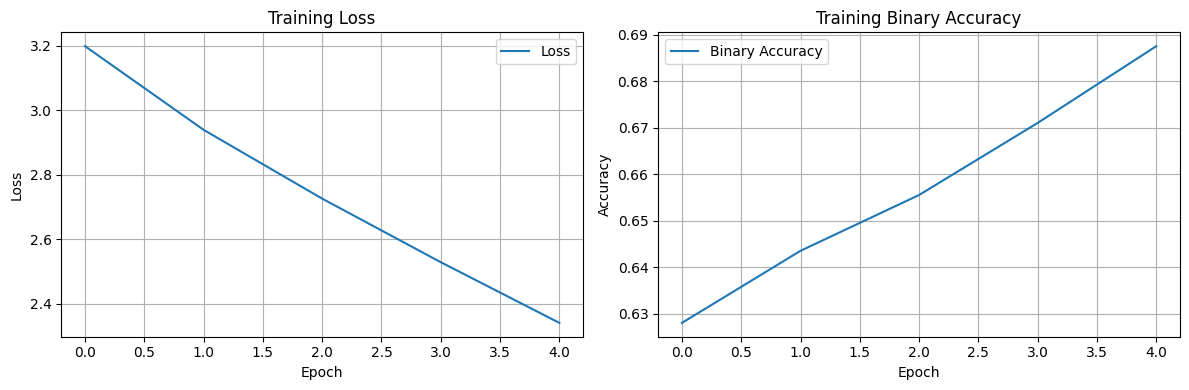

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot training binary accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["binary_accuracy"], label="Binary Accuracy")
plt.title("Training Binary Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Monitoring loss and metrics on validation data

In [115]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets),
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.8621 - loss: 0.5469 - val_binary_accuracy: 0.9150 - val_loss: 0.0895
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9564 - loss: 0.0776 - val_binary_accuracy: 0.9317 - val_loss: 0.1172
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9650 - loss: 0.0660 - val_binary_accuracy: 0.9950 - val_loss: 0.0433
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9457 - loss: 0.0773 - val_binary_accuracy: 0.9950 - val_loss: 0.0474
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9657 - loss: 0.0693 - val_binary_accuracy: 0.9100 - val_loss: 0.1333


#### Inference: Using a model after training

In [116]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[1.7427201 ]
 [0.51769626]
 [1.6295205 ]
 [0.18276045]
 [1.1767473 ]
 [0.4200292 ]
 [1.1588047 ]
 [1.6040698 ]
 [1.4628251 ]
 [0.08389956]]
